<a href="https://colab.research.google.com/github/AbedMHroub/house-rental-price/blob/data-engineering-and-cleaning/Why_data_is_bad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#!pip install category-encoders
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandas.api.types import CategoricalDtype

#from category_encoders import MEstimateEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Mute warnings
warnings.filterwarnings('ignore')

In [53]:
data_dir = Path("/content/dfFE22.csv")
df = pd.read_csv(data_dir)
df

,date,city,status,numberRooms,numberBathrooms,numberBalconies,elevator,carParking,heating,houseSpace,PriceType_JOD,PriceType_NIS,PriceType_USD,featurePlus,status_A,status_B,status_C,status_D,status_E,city_B,city_H,city_J,city_JN,city_JR,city_N,city_Q,city_RB,city_S,city_T,city_TB,MedstatusHouseSpace,city_encoded,price
0,2020-01-29,1,1,1,1,0,1,1,0,140.0,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,2179.295502,1300
1,2020-01-29,1,1,1,1,1,1,1,0,80.0,0,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,2179.295502,550
2,2020-01-29,1,1,3,3,2,1,1,1,190.0,0,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,2179.295502,1000
3,2020-01-29,1,1,3,3,1,1,1,1,190.0,0,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,2179.295502,950
4,2020-01-29,1,1,3,3,3,1,1,0,160.0,0,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,2179.295502,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,2021-03-03,1,1,2,2,1,1,1,0,120.0,0,0,1,1.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,1789.162426,600
7612,2021-03-03,1,2,3,2,1,1,1,0,140.0,0,0,1,0.666667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140.0,1789.162426,500
7613,2021-03-03,5,2,3,2,2,0,0,0,150.0,0,1,0,0.666667,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,140.0,4696.623612,1600
7614,2021-03-03,4,1,1,1,1,1,1,1,70.0,0,1,0,1.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,140.0,3882.401112,1000


# cities

**Through the following explanation, it became clear to me that almost only Ramallah is leasing in dollar currency, as shown in the right section **

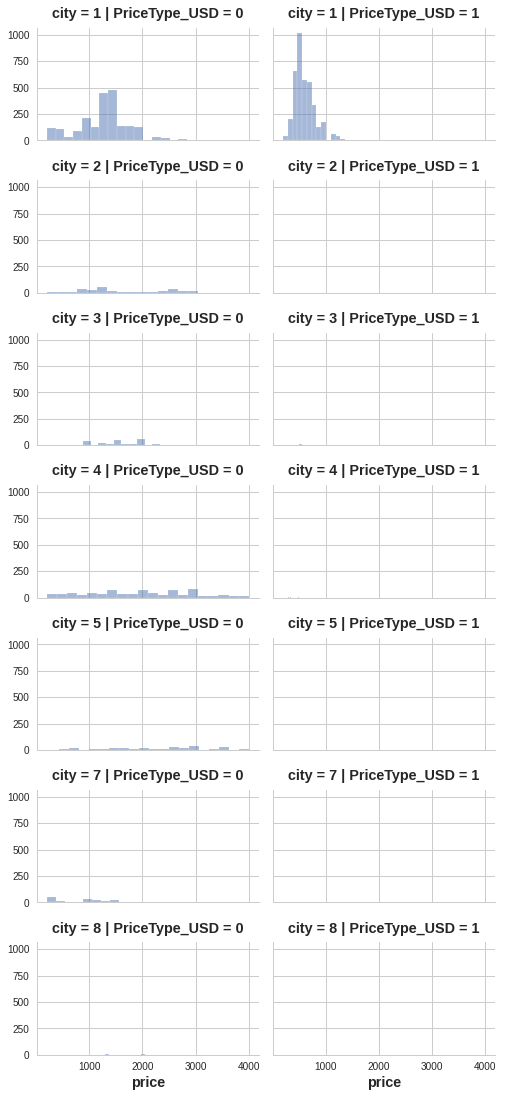

In [54]:
grid = sns.FacetGrid(df, col='PriceType_USD', row='city', size=2.2, aspect=1.6)
grid.map(plt.hist, 'price', alpha=.5, bins=20)
grid.add_legend();

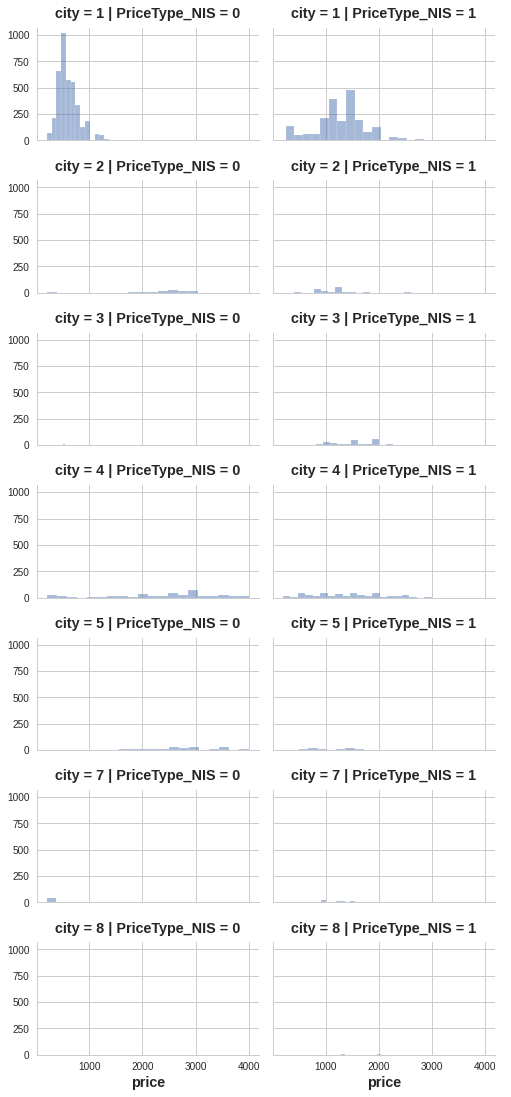

In [55]:
grid = sns.FacetGrid(df, col='PriceType_NIS', row='city', size=2.2, aspect=1.6)
grid.map(plt.hist, 'price', alpha=.5, bins=20)
grid.add_legend();

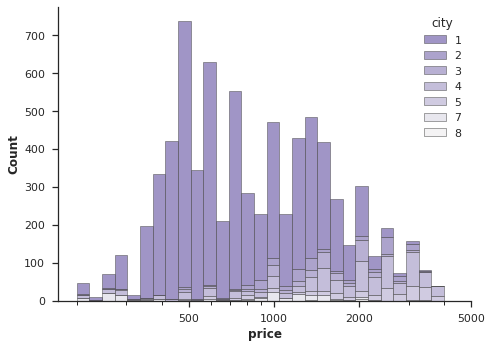

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt


sns.set_theme(style="ticks")


f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="price", hue="city",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000])

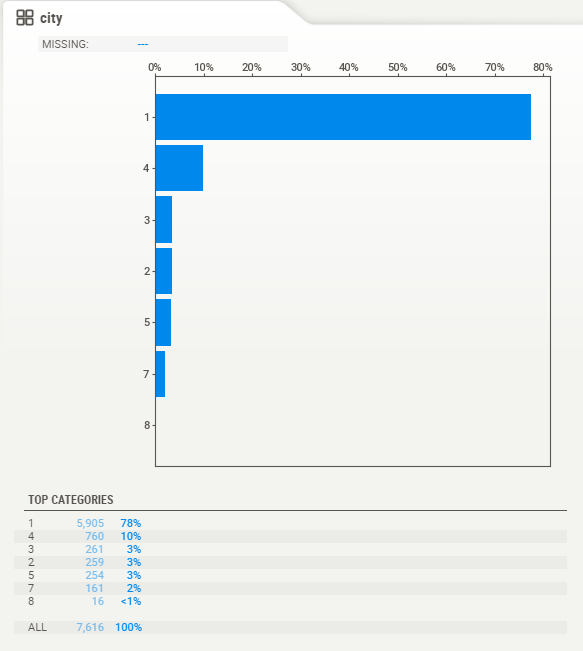

In the following illustration, it became clear to me that approximately 78% of the data is specific to Ramallah

**The conclusion** 
is that there is a **big bias** in the data for Ramallah

# status

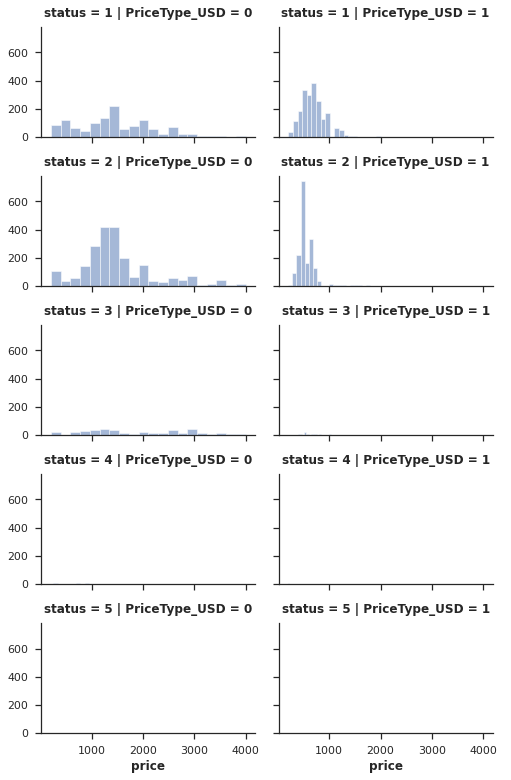

In [57]:
grid = sns.FacetGrid(df, col='PriceType_USD', row='status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'price', alpha=.5, bins=20)
grid.add_legend();

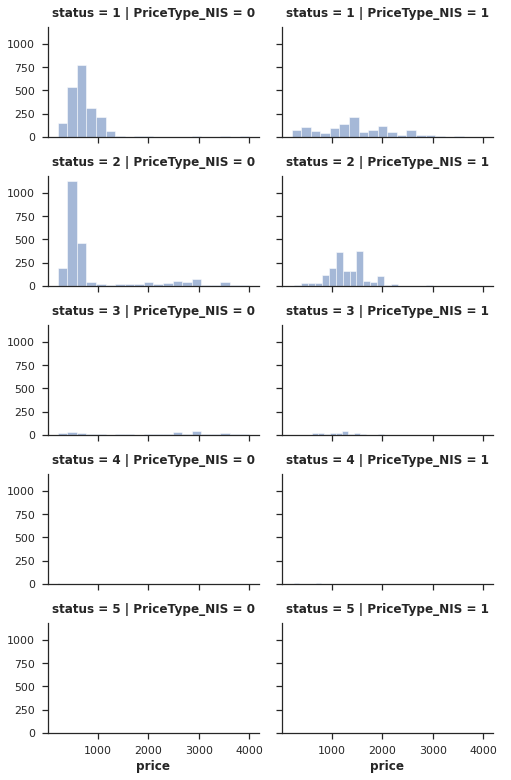

In [58]:
grid = sns.FacetGrid(df, col='PriceType_NIS', row='status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'price', alpha=.5, bins=20)
grid.add_legend();

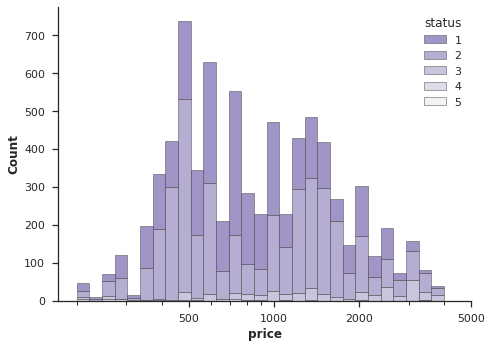

In [59]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="price", hue="status",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000])

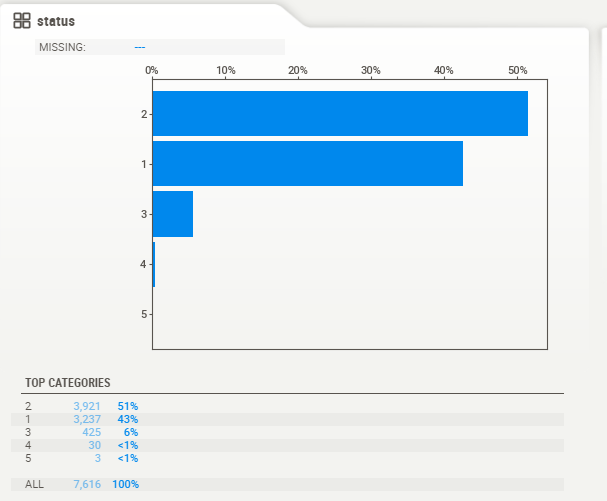

**Infer** from the data in **status** that categories 1 and 2 represent more than 90% data from the five categories, and this is a bias for the two categories

# numberBalconies

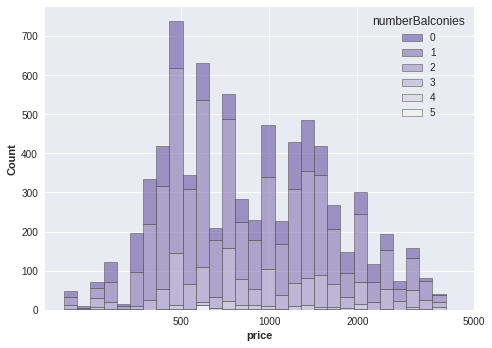

In [65]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="price", hue="numberBalconies",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000])

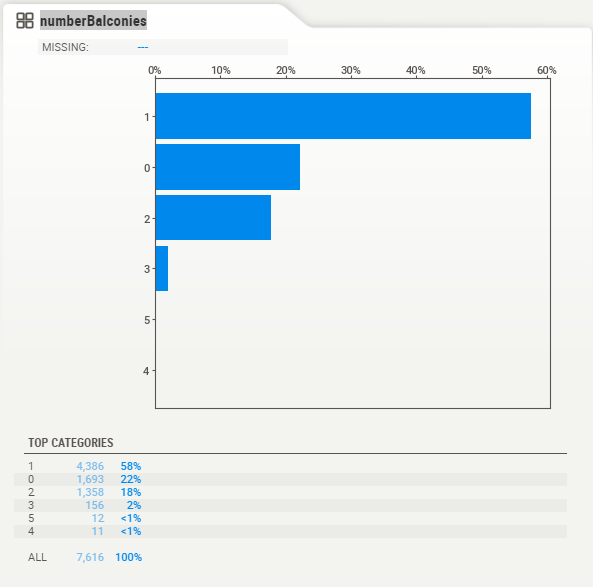

Infer from the data that there is a bias for category 1 as it accounts for more than 50% of the data for six categories

# heating

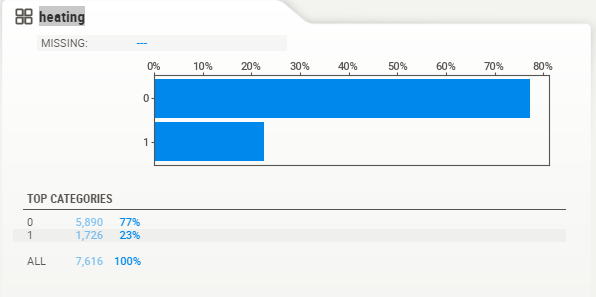


Note also that the data for Category 1 heating is a significant minority



# priceType

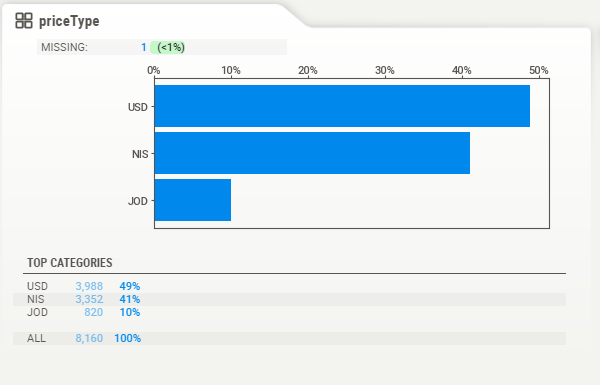

note that leasing in the Jordanian dinar currency represents a minority of the data

# date

In [61]:
df.date

0       2020-01-29
1       2020-01-29
2       2020-01-29
3       2020-01-29
4       2020-01-29
           ...    
7611    2021-03-03
7612    2021-03-03
7613    2021-03-03
7614    2021-03-03
7615    2021-03-03
Name: date, Length: 7616, dtype: object

In [62]:
df['date_parsed'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [63]:
df.date_parsed

0      2020-01-29
1      2020-01-29
2      2020-01-29
3      2020-01-29
4      2020-01-29
          ...    
7611   2021-03-03
7612   2021-03-03
7613   2021-03-03
7614   2021-03-03
7615   2021-03-03
Name: date_parsed, Length: 7616, dtype: datetime64[ns]

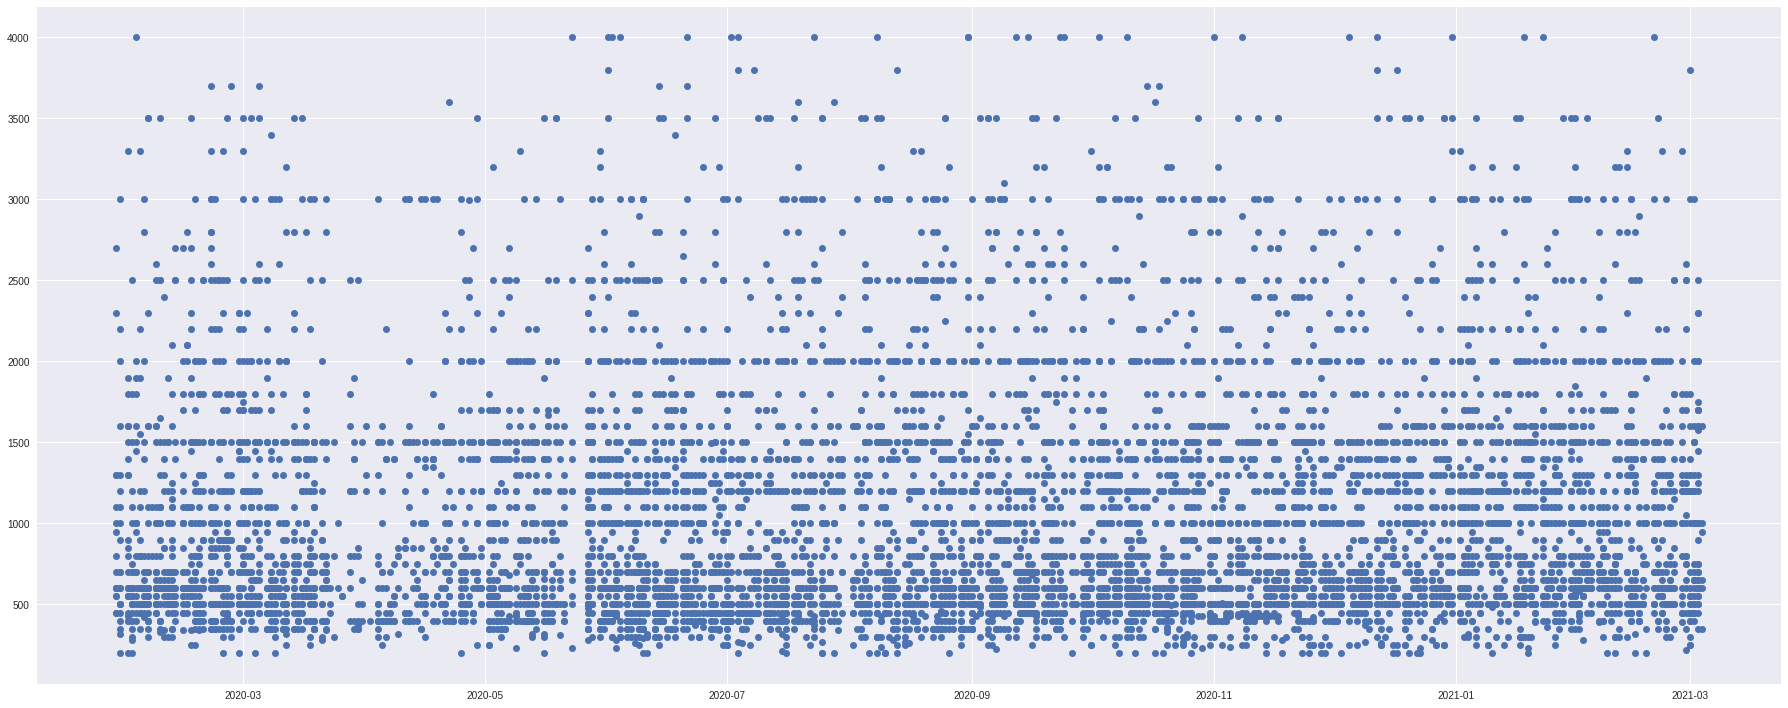

In [64]:

plt.figure(figsize=(25, 10))
plt.style.use('seaborn')
plt.plot_date(df.date_parsed,df.price)
plt.tight_layout()
plt.show()

# Conclusion Why data is bad:
Most of the important features that you get contain biased data, sometimes too much.

Out of the 9 features, 5 of them have a clear bias in their data
[**city**, **status** , numberRooms ,**numberBathrooms** ,numberBalconies ,elevator ,carParking ,**heating** ,**priceType**]